In [12]:
!pip install Tensorflow

In [13]:
!pip install keras

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import datetime as dt
from datetime import datetime
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint,TensorBoard
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

%matplotlib inline

In [2]:
df = pd.read_csv('time_series_covid19_confirmed_global.csv',index_col='Country/Region')

In [3]:
df.head()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,0,...,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,0,...,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535
Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,0,...,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023
Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,0,...,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681
Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,0,...,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117


In [4]:
df1 = df.drop(['Province/State','Long','Lat'],axis=1)

In [5]:
df1.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
Albania,0,0,0,0,0,0,0,0,0,0,...,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535
Algeria,0,0,0,0,0,0,0,0,0,0,...,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023
Andorra,0,0,0,0,0,0,0,0,0,0,...,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681
Angola,0,0,0,0,0,0,0,0,0,0,...,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117


In [6]:
df_trans =df1.transpose()

In [7]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 1/22/20 to 9/21/20
Columns: 266 entries, Afghanistan to Zimbabwe
dtypes: int64(266)
memory usage: 519.0+ KB


In [8]:
data = df_trans.loc[:,['India','US','Brazil','Russia','Colombia','Peru','Mexico','Spain','South Africa','Argentina']]

In [9]:
data.head()

Country/Region,India,US,Brazil,Russia,Colombia,Peru,Mexico,Spain,South Africa,Argentina
1/22/20,0,1,0,0,0,0,0,0,0,0
1/23/20,0,1,0,0,0,0,0,0,0,0
1/24/20,0,2,0,0,0,0,0,0,0,0
1/25/20,0,2,0,0,0,0,0,0,0,0
1/26/20,0,5,0,0,0,0,0,0,0,0


In [10]:
data.reset_index(inplace = True)

In [11]:
data

Country/Region,index,India,US,Brazil,Russia,Colombia,Peru,Mexico,Spain,South Africa,Argentina
0,1/22/20,0,1,0,0,0,0,0,0,0,0
1,1/23/20,0,1,0,0,0,0,0,0,0,0
2,1/24/20,0,2,0,0,0,0,0,0,0,0
3,1/25/20,0,2,0,0,0,0,0,0,0,0
4,1/26/20,0,5,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
239,9/17/20,5214677,6674411,4455386,1081152,743945,744400,684113,625651,655572,601713
240,9/18/20,5308014,6723933,4495183,1086955,750471,750098,688954,640040,657627,613658
241,9/19/20,5400619,6768119,4528240,1092915,758398,756412,694121,640040,659656,622934
242,9/20/20,5487580,6804814,4544629,1098958,765076,762865,697663,640040,661211,631365


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         244 non-null    object
 1   India         244 non-null    int64 
 2   US            244 non-null    int64 
 3   Brazil        244 non-null    int64 
 4   Russia        244 non-null    int64 
 5   Colombia      244 non-null    int64 
 6   Peru          244 non-null    int64 
 7   Mexico        244 non-null    int64 
 8   Spain         244 non-null    int64 
 9   South Africa  244 non-null    int64 
 10  Argentina     244 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 21.1+ KB


In [13]:
cols = list(data)[1:11]

In [14]:
cols

['India',
 'US',
 'Brazil',
 'Russia',
 'Colombia',
 'Peru',
 'Mexico',
 'Spain',
 'South Africa',
 'Argentina']

In [15]:
data['index'] = pd.to_datetime(data['index'],infer_datetime_format=True)

In [16]:
data

Country/Region,index,India,US,Brazil,Russia,Colombia,Peru,Mexico,Spain,South Africa,Argentina
0,2020-01-22,0,1,0,0,0,0,0,0,0,0
1,2020-01-23,0,1,0,0,0,0,0,0,0,0
2,2020-01-24,0,2,0,0,0,0,0,0,0,0
3,2020-01-25,0,2,0,0,0,0,0,0,0,0
4,2020-01-26,0,5,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
239,2020-09-17,5214677,6674411,4455386,1081152,743945,744400,684113,625651,655572,601713
240,2020-09-18,5308014,6723933,4495183,1086955,750471,750098,688954,640040,657627,613658
241,2020-09-19,5400619,6768119,4528240,1092915,758398,756412,694121,640040,659656,622934
242,2020-09-20,5487580,6804814,4544629,1098958,765076,762865,697663,640040,661211,631365


array([<AxesSubplot:xlabel='index'>, <AxesSubplot:xlabel='index'>,
       <AxesSubplot:xlabel='index'>, <AxesSubplot:xlabel='index'>,
       <AxesSubplot:xlabel='index'>, <AxesSubplot:xlabel='index'>,
       <AxesSubplot:xlabel='index'>, <AxesSubplot:xlabel='index'>,
       <AxesSubplot:xlabel='index'>, <AxesSubplot:xlabel='index'>],
      dtype=object)

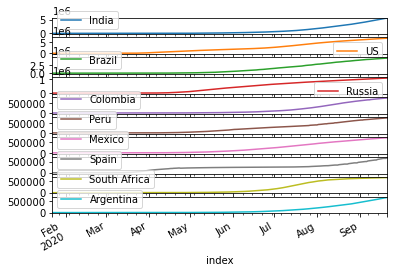

In [17]:
data.set_index('index')[['India','US', 'Brazil', 'Russia','Colombia','Peru', 'Mexico', 'Spain', 'South Africa', 'Argentina']].plot(subplots=True)

In [18]:
data.reset_index(drop=True,inplace=True)

In [19]:
data

Country/Region,index,India,US,Brazil,Russia,Colombia,Peru,Mexico,Spain,South Africa,Argentina
0,2020-01-22,0,1,0,0,0,0,0,0,0,0
1,2020-01-23,0,1,0,0,0,0,0,0,0,0
2,2020-01-24,0,2,0,0,0,0,0,0,0,0
3,2020-01-25,0,2,0,0,0,0,0,0,0,0
4,2020-01-26,0,5,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
239,2020-09-17,5214677,6674411,4455386,1081152,743945,744400,684113,625651,655572,601713
240,2020-09-18,5308014,6723933,4495183,1086955,750471,750098,688954,640040,657627,613658
241,2020-09-19,5400619,6768119,4528240,1092915,758398,756412,694121,640040,659656,622934
242,2020-09-20,5487580,6804814,4544629,1098958,765076,762865,697663,640040,661211,631365


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         244 non-null    datetime64[ns]
 1   India         244 non-null    int64         
 2   US            244 non-null    int64         
 3   Brazil        244 non-null    int64         
 4   Russia        244 non-null    int64         
 5   Colombia      244 non-null    int64         
 6   Peru          244 non-null    int64         
 7   Mexico        244 non-null    int64         
 8   Spain         244 non-null    int64         
 9   South Africa  244 non-null    int64         
 10  Argentina     244 non-null    int64         
dtypes: datetime64[ns](1), int64(10)
memory usage: 21.1 KB


In [21]:
data1 = data.iloc[:,1:11]

In [22]:
data1

Country/Region,India,US,Brazil,Russia,Colombia,Peru,Mexico,Spain,South Africa,Argentina
0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,2,0,0,0,0,0,0,0,0
3,0,2,0,0,0,0,0,0,0,0
4,0,5,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
239,5214677,6674411,4455386,1081152,743945,744400,684113,625651,655572,601713
240,5308014,6723933,4495183,1086955,750471,750098,688954,640040,657627,613658
241,5400619,6768119,4528240,1092915,758398,756412,694121,640040,659656,622934
242,5487580,6804814,4544629,1098958,765076,762865,697663,640040,661211,631365


In [23]:
data1 =data1[cols].astype(str)
for i in cols:
    for j in range(0,len(data)):
        data1[i][j] = data1[i][j].replace(',','')
        
data1 = data1.astype(float)

In [24]:
dataset = data.loc[:,'index']

In [25]:
dataset_train = pd.concat([dataset,data1],axis=1)

In [26]:
dataset_train

,index,India,US,Brazil,Russia,Colombia,Peru,Mexico,Spain,South Africa,Argentina
0,2020-01-22,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-23,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-24,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-25,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-26,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
239,2020-09-17,5214677.0,6674411.0,4455386.0,1081152.0,743945.0,744400.0,684113.0,625651.0,655572.0,601713.0
240,2020-09-18,5308014.0,6723933.0,4495183.0,1086955.0,750471.0,750098.0,688954.0,640040.0,657627.0,613658.0
241,2020-09-19,5400619.0,6768119.0,4528240.0,1092915.0,758398.0,756412.0,694121.0,640040.0,659656.0,622934.0
242,2020-09-20,5487580.0,6804814.0,4544629.0,1098958.0,765076.0,762865.0,697663.0,640040.0,661211.0,631365.0


In [27]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         244 non-null    datetime64[ns]
 1   India         244 non-null    float64       
 2   US            244 non-null    float64       
 3   Brazil        244 non-null    float64       
 4   Russia        244 non-null    float64       
 5   Colombia      244 non-null    float64       
 6   Peru          244 non-null    float64       
 7   Mexico        244 non-null    float64       
 8   Spain         244 non-null    float64       
 9   South Africa  244 non-null    float64       
 10  Argentina     244 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 21.1 KB


In [28]:
dataset_train = dataset_train.set_index('index')

In [29]:
dataset_train

,India,US,Brazil,Russia,Colombia,Peru,Mexico,Spain,South Africa,Argentina
index,,,,,,,,,,
2020-01-22,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-23,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-09-17,5214677.0,6674411.0,4455386.0,1081152.0,743945.0,744400.0,684113.0,625651.0,655572.0,601713.0
2020-09-18,5308014.0,6723933.0,4495183.0,1086955.0,750471.0,750098.0,688954.0,640040.0,657627.0,613658.0
2020-09-19,5400619.0,6768119.0,4528240.0,1092915.0,758398.0,756412.0,694121.0,640040.0,659656.0,622934.0


In [45]:
dataset_train.describe()

,India,US,Brazil,Russia,Colombia,Peru,Mexico,Spain,South Africa,Argentina
count,2.440000e+02,2.440000e+02,2.440000e+02,2.440000e+02,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,9.338968e+05,2.229623e+06,1.198699e+06,4.068467e+05,152226.750000,213869.803279,190540.454918,211179.168033,182757.000000,105159.032787
std,1.466931e+06,2.217089e+06,1.491702e+06,3.945631e+05,230684.161379,239487.634149,230669.049617,163490.852484,247523.482141,167628.063543
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.732500e+02,4.117550e+04,1.829500e+03,4.202500e+02,265.500000,387.000000,354.250000,33544.000000,370.000000,292.250000
50%,1.281085e+05,1.619564e+06,3.391440e+05,3.311650e+05,19654.000000,113726.000000,64191.500000,235057.000000,20734.000000,11001.000000
75%,1.251126e+06,3.987295e+06,2.242504e+06,7.893475e+05,220414.250000,367686.500000,364383.500000,268204.750000,398224.000000,143431.750000
max,5.487580e+06,6.856884e+06,4.558040e+06,1.105048e+06,770435.000000,768895.000000,700580.000000,671468.000000,661936.000000,640147.000000


In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
scaler = MinMaxScaler()
dataset_scaled = scaler.fit_transform(dataset_train)

train_set = dataset_train.to_numpy()
print(train_set.shape)
print(train_set)

sc =StandardScaler()
train_set_scaled = sc.fit_transform(train_set)

sc_predict = StandardScaler()
sc_predict.fit_transform(train_set[:,0:1])

In [48]:
dataset_scaled

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.45838860e-07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.84153124e-01, 9.87054614e-01, 9.93462102e-01, ...,
        9.53195089e-01, 9.96555558e-01, 9.73110864e-01],
       [1.00000000e+00, 9.92406171e-01, 9.97057727e-01, ...,
        9.53195089e-01, 9.98904728e-01, 9.86281276e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

In [60]:
features = dataset_scaled
target = dataset_scaled[:,0]

In [62]:
TimeseriesGenerator(features,target,length=2,sampling_rate=1,batch_size=1)[0]

(array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]]),
 array([0.]))

In [63]:
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.20,random_state=35,shuffle=False)

In [64]:
X_train.shape

(195, 10)

In [66]:
X_test.shape

(49, 10)

In [70]:
win_length = 10
batch_size = 32
num_features = 10
train_generator = TimeseriesGenerator(X_train,y_train,length=win_length,sampling_rate=1,batch_size=batch_size)
test_generator = TimeseriesGenerator(X_test,y_test,length=win_length,sampling_rate=1,batch_size=batch_size)

In [72]:
train_generator[0]

(array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 1.45838860e-07, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [0.00000000e+00, 5.83355440e-07, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [1.82229690e-07, 5.83355440e-07, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [1.82229690e-07, 8.75033160e-07, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
 
        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 1.45838860e-07, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       

In [76]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128,input_shape=(win_length,num_features),return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128,return_sequences=True))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64,return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

In [77]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 10, 128)           71168     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 10, 128)           0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 10, 128)           131584    
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 128)           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [78]:
earlyStopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='min',verbose=1)

In [79]:
model.compile(loss=tf.losses.MeanSquaredError(),
             optimizer = tf.optimizers.Adam(),
             metrics = [tf.metrics.MeanAbsoluteError()])
history = model.fit_generator(train_generator,epochs=50,
                             validation_data=test_generator,
                             shuffle=False,
                             callbacks=[earlyStopping])

C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
6/6 [==============================] - 16s 511ms/step - loss: 5.0258e-04 - mean_absolute_error: 0.0086 - val_loss: 0.1391 - val_mean_absolute_error: 0.3479
Epoch 2/50
6/6 [==============================] - 0s 57ms/step - loss: 0.0067 - mean_absolute_error: 0.0696 - val_loss: 0.1340 - val_mean_absolute_error: 0.3426
Epoch 3/50
6/6 [==============================] - 0s 70ms/step - loss: 0.0024 - mean_absolute_error: 0.0315 - val_loss: 0.3713 - val_mean_absolute_error: 0.5905
Epoch 4/50
6/6 [==============================] - 0s 57ms/step - loss: 0.0019 - mean_absolute_error: 0.0358 - val_loss: 0.2709 - val_mean_absolute_error: 0.5001
Epoch 5/50
6/6 [==============================] - 0s 60ms/step - loss: 2.7744e-04 - mean_absolute_error: 0.0114 - val_loss: 0.1293 - val_mean_absolute_error: 0.3346
Epoch 6/50
6/6 [==============================] - 0s 62ms/step - loss: 0.0012 - mean_absolute_error: 0.0275 - val_loss: 0.0925 - val_mean_absolute_error: 0.2768
Epoch 7/50
6/6 [========

In [80]:
model.evaluate_generator(test_generator,verbose = 0)

C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.08114423602819443, 0.2589964270591736]

In [81]:
predictions = model.predict_generator(test_generator)

C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [82]:
predictions.shape[0]

39

In [83]:
y_test

array([0.34774053, 0.35799679, 0.36939307, 0.38060693, 0.39234234,
       0.40365225, 0.41341994, 0.42452921, 0.43673842, 0.44850189,
       0.46029798, 0.47196615, 0.48248281, 0.49250872, 0.50427566,
       0.51697196, 0.52952759, 0.54226107, 0.55487847, 0.56606883,
       0.57718029, 0.5876082 , 0.60322291, 0.61730307, 0.63123854,
       0.64559113, 0.65989835, 0.67264003, 0.68691901, 0.70220498,
       0.71739218, 0.73314266, 0.7496585 , 0.76620532, 0.78001997,
       0.79636707, 0.81381283, 0.83140729, 0.84918744, 0.86638482,
       0.88316289, 0.89843538, 0.91485846, 0.93269766, 0.95026897,
       0.96727774, 0.98415312, 1.        , 1.        ])

In [85]:
X_test

array([[0.34774053, 0.69580872, 0.61472058, 0.77803136, 0.43479203,
        0.57210672, 0.64226926, 0.45097309, 0.78756557, 0.33357182],
       [0.35799679, 0.70351047, 0.6272593 , 0.78272437, 0.44872572,
        0.58216532, 0.651032  , 0.45537092, 0.80049582, 0.34473644],
       [0.36939307, 0.71221589, 0.6389176 , 0.78746534, 0.46429614,
        0.59229023, 0.66043849, 0.46145907, 0.81304537, 0.35647281],
       [0.38060693, 0.72069977, 0.64993769, 0.79216287, 0.47661905,
        0.60330084, 0.67002626, 0.46817123, 0.82406154, 0.36816075],
       [0.39234234, 0.72889212, 0.66090074, 0.79685498, 0.48916521,
        0.60330084, 0.67929715, 0.46817123, 0.83571221, 0.37774292],
       [0.40365225, 0.73573707, 0.66594896, 0.80151993, 0.50293795,
        0.62170257, 0.68554341, 0.46817123, 0.84579023, 0.38506624],
       [0.41341994, 0.74296134, 0.67078613, 0.80611792, 0.51610194,
        0.62834717, 0.69347683, 0.4810058 , 0.85143881, 0.39657766],
       [0.42452921, 0.74978777, 0.6822296

In [86]:
X_test[:,1:][win_length:]

array([[0.77487847, 0.71862467, 0.82419768, 0.57773985, 0.6714779 ,
        0.72992235, 0.51054257, 0.87491842, 0.44120647],
       [0.78186605, 0.72774614, 0.82874952, 0.59276772, 0.6714779 ,
        0.73897913, 0.51054257, 0.8817363 , 0.45161502],
       [0.78799828, 0.73281432, 0.83319367, 0.60787996, 0.6838424 ,
        0.74532816, 0.51054257, 0.88731388, 0.46015837],
       [0.79311897, 0.73706462, 0.83757267, 0.61868944, 0.69703406,
        0.75042536, 0.53477158, 0.89115262, 0.46727705],
       [0.79969091, 0.74754807, 0.84184216, 0.63486472, 0.7042483 ,
        0.75828456, 0.54238772, 0.89456382, 0.47796209],
       [0.80646308, 0.75836368, 0.84617682, 0.65181099, 0.71442915,
        0.766552  , 0.55232267, 0.9004798 , 0.4884175 ],
       [0.81288335, 0.76830721, 0.85049066, 0.66679084, 0.72626301,
        0.77622256, 0.56280567, 0.9063414 , 0.50126612],
       [0.81997447, 0.77496687, 0.85486875, 0.67771843, 0.73749862,
        0.78468412, 0.57494028, 0.91147483, 0.51401163],


In [87]:
df_pred = pd.concat([pd.DataFrame(predictions),pd.DataFrame(X_test[:,1:][win_length:])],axis=1)

In [101]:
df_pred

,0,0,1,2,3,4,5,6,7,8
0,0.366372,0.774878,0.718625,0.824198,0.577740,0.671478,0.729922,0.510543,0.874918,0.441206
1,0.372388,0.781866,0.727746,0.828750,0.592768,0.671478,0.738979,0.510543,0.881736,0.451615
2,0.378249,0.787998,0.732814,0.833194,0.607880,0.683842,0.745328,0.510543,0.887314,0.460158
3,0.383940,0.793119,0.737065,0.837573,0.618689,0.697034,0.750425,0.534772,0.891153,0.467277
4,0.389487,0.799691,0.747548,0.841842,0.634865,0.704248,0.758285,0.542388,0.894564,0.477962
5,0.394882,0.806463,0.758364,0.846177,0.651811,0.714429,0.766552,0.552323,0.900480,0.488418
6,0.400101,0.812883,0.768307,0.850491,0.666791,0.726263,0.776223,0.562806,0.906341,0.501266
7,0.405367,0.819974,0.774967,0.854869,0.677718,0.737499,0.784684,0.574940,0.911475,0.514012
8,0.410554,0.826479,0.785944,0.859267,0.691951,0.749214,0.793936,0.574940,0.917075,0.526132
9,0.415706,0.831521,0.791082,0.863608,0.702381,0.761139,0.799572,0.574940,0.921196,0.534493


In [90]:
rev_trans = scaler.inverse_transform(df_pred)

In [91]:
rev_trans

array([[2010496.25494003, 5313252.        , 3275520.        ,
         910778.        ,  445111.        ,  516296.        ,
         511369.        ,  342813.        ,  579140.        ,
         282437.        ],
       [2043507.17091739, 5361165.        , 3317096.        ,
         915808.        ,  456689.        ,  516296.        ,
         517714.        ,  342813.        ,  583653.        ,
         289100.        ],
       [2075669.13711131, 5403213.        , 3340197.        ,
         920719.        ,  468332.        ,  525803.        ,
         522162.        ,  342813.        ,  587345.        ,
         294569.        ],
       [2106902.18117654, 5438325.        , 3359570.        ,
         925558.        ,  476660.        ,  535946.        ,
         525733.        ,  359082.        ,  589886.        ,
         299126.        ],
       [2137341.06223881, 5483388.        , 3407354.        ,
         930276.        ,  489122.        ,  541493.        ,
         531239.        

In [104]:
df_final  = dataset_train[predictions.shape[0]*-1:]

In [105]:
df_final.count()

India           39
US              39
Brazil          39
Russia          39
Colombia        39
Peru            39
Mexico          39
Spain           39
South Africa    39
Argentina       39
dtype: int64

In [109]:
df_final

,India,US,Brazil,Russia,Colombia,Peru,Mexico,Spain,South Africa,Argentina,Pred
index,,,,,,,,,,,
2020-08-14,2525922.0,5313252.0,3275520.0,910778.0,445111.0,516296.0,511369.0,342813.0,579140.0,282437.0,2.010496e+06
2020-08-15,2589952.0,5361165.0,3317096.0,915808.0,456689.0,516296.0,517714.0,342813.0,583653.0,289100.0,2.043507e+06
2020-08-16,2647663.0,5403213.0,3340197.0,920719.0,468332.0,525803.0,522162.0,342813.0,587345.0,294569.0,2.075669e+06
2020-08-17,2702681.0,5438325.0,3359570.0,925558.0,476660.0,535946.0,525733.0,359082.0,589886.0,299126.0,2.106902e+06
2020-08-18,2767253.0,5483388.0,3407354.0,930276.0,489122.0,541493.0,531239.0,364196.0,592144.0,305966.0,2.137341e+06
2020-08-19,2836925.0,5529824.0,3456652.0,935066.0,502178.0,549321.0,537031.0,370867.0,596060.0,312659.0,2.166945e+06
2020-08-20,2905825.0,5573847.0,3501975.0,939833.0,513719.0,558420.0,543806.0,377906.0,599940.0,320884.0,2.195588e+06
2020-08-21,2975701.0,5622470.0,3532330.0,944671.0,522138.0,567059.0,549734.0,386054.0,603338.0,329043.0,2.224481e+06
2020-08-22,3044940.0,5667070.0,3582362.0,949531.0,533103.0,576067.0,556216.0,386054.0,607045.0,336802.0,2.252950e+06


In [108]:
df_final['Pred']=rev_trans[:,0]

<ipython-input-108-3d970065adb4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Pred']=rev_trans[:,0]


<AxesSubplot:xlabel='index'>

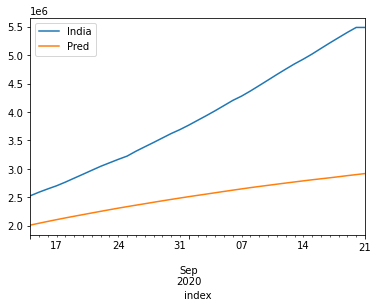

In [110]:
df_final[['India','Pred']].plot()

In [59]:
n_future = 30
n_past = 90